In [1]:
import models.get_model
import torch
from utils.loader import DicomDataset3D
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
import utils.notebooks as nb
import importlib

In [2]:
importlib.reload(nb)

<module 'utils.notebooks' from '/home/casimir/UNI/WS_22/KAP/utils/notebooks.py'>

In [3]:
BATCH_SIZE = 8
train_dl = DataLoader(DicomDataset3D("data/validation.csv"), batch_size=BATCH_SIZE)

AUGMENT_TIMES: 32
AUGMENT_TIMES: 32
AUGMENT_TIMES: 32
AUGMENT_TIMES: 32
AUGMENT_TIMES: 32
AUGMENT_TIMES: 32
AUGMENT_TIMES: 32
AUGMENT_TIMES: 32
inputs shape: torch.Size([8, 1, 64, 256, 256])
labels shape: torch.Size([8, 1, 64, 256, 256])
inputs type: torch.float32
labels type: torch.float32


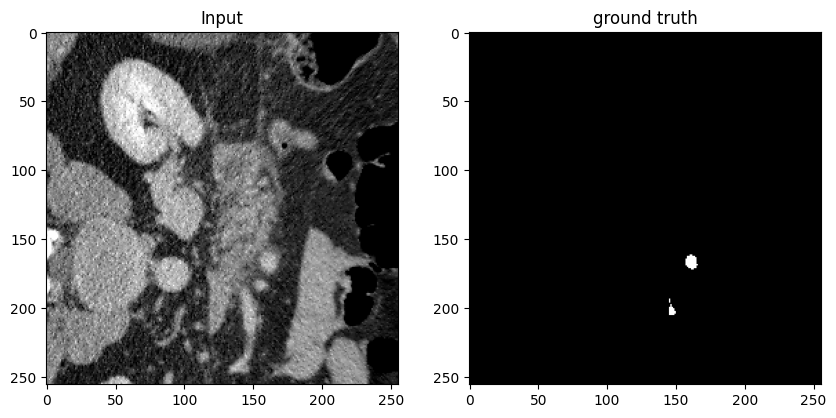

In [7]:
import itertools
# train_batch, labels_batch = next(itertools.islice(iter(train_dl), 5, 6))
dl_iter = iter(train_dl)
for i in range(1):
    train_batch, labels_batch = next(dl_iter)

print(f'inputs shape: {train_batch.shape}')
print(f'labels shape: {labels_batch.shape}')
feat1, label1 = train_batch[3], labels_batch[3]
print(f'inputs type: {feat1.dtype}')
print(f'labels type: {label1.dtype}')

nb.show_slice(feat1, label1, 60)

In [5]:
from tqdm import tqdm

model = models.get_model.get_arch('wnet', in_c=1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = torch.nn.CrossEntropyLoss()

for data in tqdm(iter(train_dataloader)):
    inputs, labels = data
    input = inputs
    label = labels

    optimizer.zero_grad()

    out1, output = model(input)
    loss = criterion(output, label)

    loss.backward()
    optimizer.step()


ModuleNotFoundError: No module named 'tqdm'

In [ ]:
torch.save(model, 'models/first_model.pt')

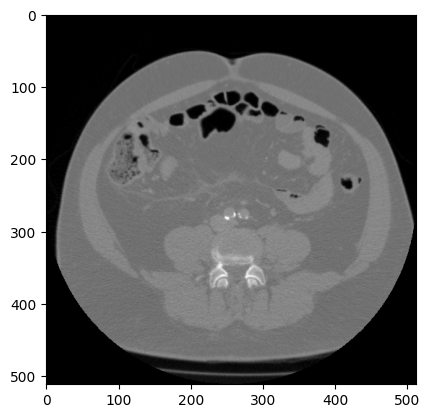

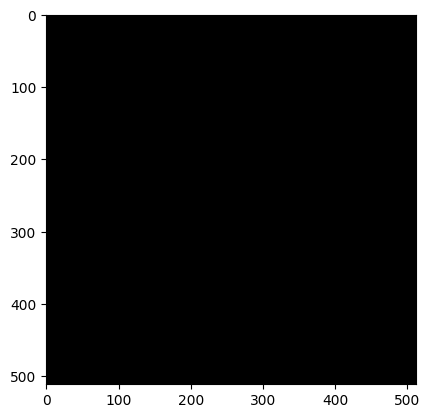

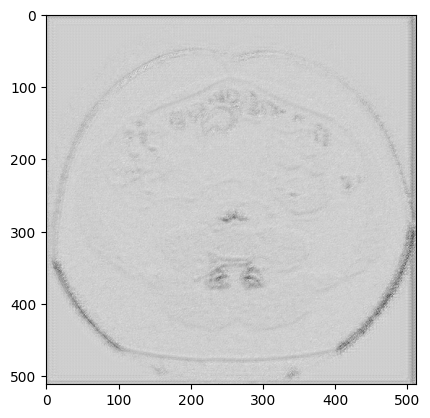

In [ ]:
test_data = DicomDataset3D("data/test.csv")
test_dataloader = DataLoader(test_data, batch_size=10)

train_batch, labels_batch = next(iter(test_dataloader))

nb.show(train_batch[0])
nb.show(labels_batch[0])
with torch.no_grad():
    _, pred = model(train_batch)
    nb.show(pred[0])